In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import sys

class Lisazh():
    
    def __init__(self):
        pass
    
    @staticmethod
    def draw(v):
        # Параметри для фігур Лісажу

        # випадки: 
        # 1) w1 = w 2
        if v == 1:
            Ax = 1              # Амплітуда по осі X Ax
            Bx = 1              # Амплітуда по осі Y Ay
            omega_a = 3         # Частота по осі X Wx
            omega_b = 3         # Частота по осі Y Wy
        
        # 2) w1 ~ w2
        if v == 2:
            Ax = 1              # Амплітуда по осі X Ax
            Bx = 1              # Амплітуда по осі Y Ay
            omega_a = 3         # Частота по осі X Wx
            omega_b = 3.02      # Частота по осі Y Wy
        
        # 3) w1 = 2w2
        if v == 3:
            Ax = 1              # Амплітуда по осі X Ax
            Bx = 1              # Амплітуда по осі Y Ay
            omega_a = 3         # Частота по осі X Wx
            omega_b = 6         # Частота по осі Y Wy

        if v <= 3:
            delta = np.pi / 2 # Фазовий зсув (радіани)

            # Створення масиву часу
            t = np.linspace(0, 2 * np.pi, 1000)

            # Рівняння фігур Лісажу
            x = Ax * np.sin(omega_a * t + delta)
            y = Bx * np.sin(omega_b * t)

            # Створення графіку
            plt.figure(figsize=(8, 8)) # Розмір вікна
            plt.plot(x, y, color='blue', linewidth=2)
            plt.title(f'Фігура Лісажу: omega_a={omega_a}, omega_b={omega_b}, $\\delta$={delta:.2f}')
            plt.xlabel('x(t) = Ax sin(at + $\\delta$)')
            plt.ylabel('y(t) = Bx sin(bt)')
            plt.grid(True)
            plt.show()
        
        if v == 4:
            """ 
            Поліном Чебишева n-го порядку:  
            Tn(x) = cos(n*arccos(x)) = cos (n * (cos x / sin x)) -> 
            Tn+1 (x) = 2xTn(x) - Tn-1 (x)
            3 <= n <= 7
            """
            from numpy.polynomial.chebyshev import chebval

            # Визначення інтервалу для X
            x = np.linspace(-1.0, 1.0, 200)

            # Степені поліномів, які потрібно побудувати
            degrees = range(3, 8)

            plt.figure(figsize=(17, 9))
            plt.title('Поліноми Чебишева $T_n(x)$ для $n$ від 3 до 7')
            plt.xlabel('x')
            plt.ylabel('$T_n(x)$')
            plt.grid(True, linestyle='--', alpha=0.6)
            plt.axhline(0, color='black', linewidth=0.5)

            colors = ['red', 'blue', 'green', 'purple', 'orange']
            line_styles = ['-', '--', ':', '-.', '-']

            for i, n in enumerate(degrees):
                # Коефіцієнти для Tn(x): масив довжиною n+1, де тільки n-й елемент дорівнює 1.
                # [T_0, T_1, ..., T_n]
                coefs = [0] * n + [1]
                
                # Обчислення значень полінома Tn(x)
                y = chebval(x, coefs)
                
                # Побудова графіка
                plt.plot(x, y, 
                        label=f'$T_{n}(x)$', 
                        color=colors[i % len(colors)], 
                        linestyle=line_styles[i % len(line_styles)],
                        linewidth=2 if n % 2 == 1 else 1.5) # Тонкіша лінія для парних степенів

            # Налаштування меж Y (всі поліноми на [-1, 1] обмежені значеннями від -1 до 1)
            plt.ylim(-1.1, 1.1)
            plt.legend(loc='lower right')
            plt.show() 

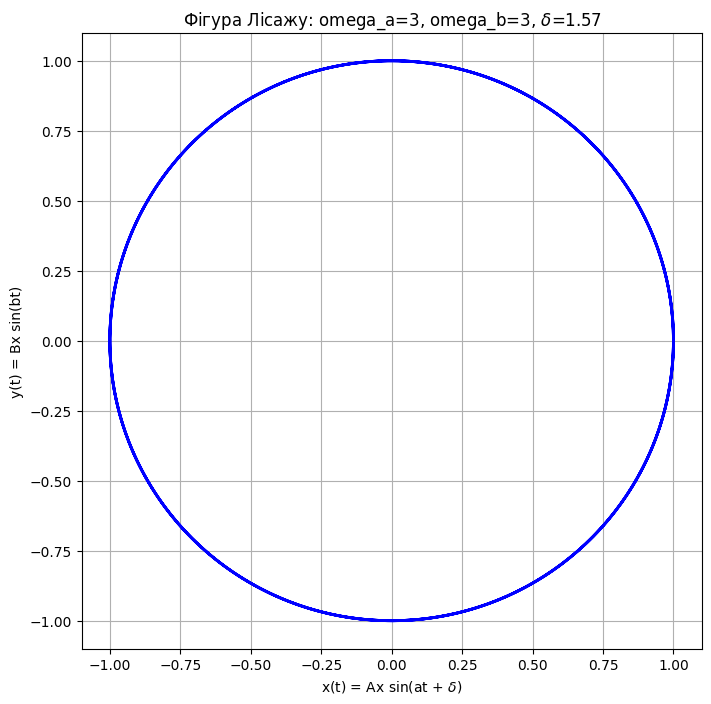

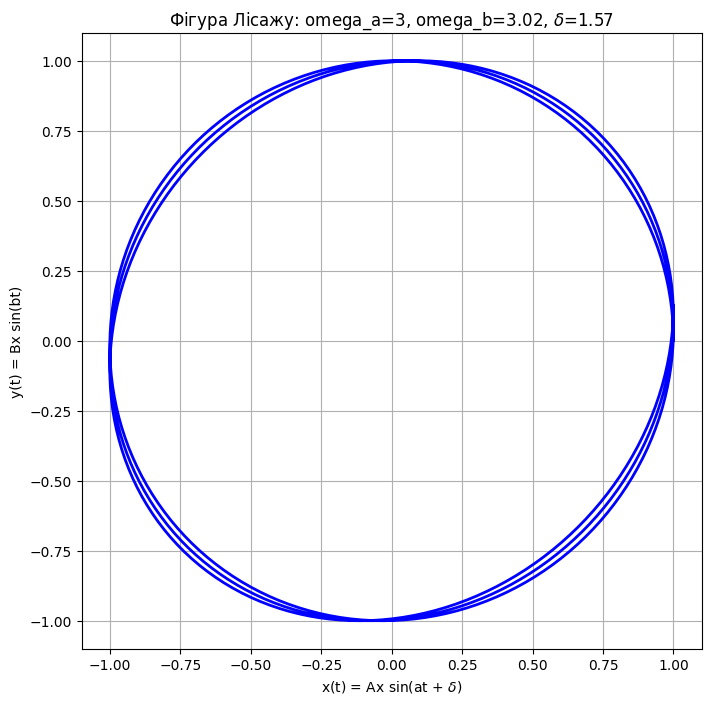

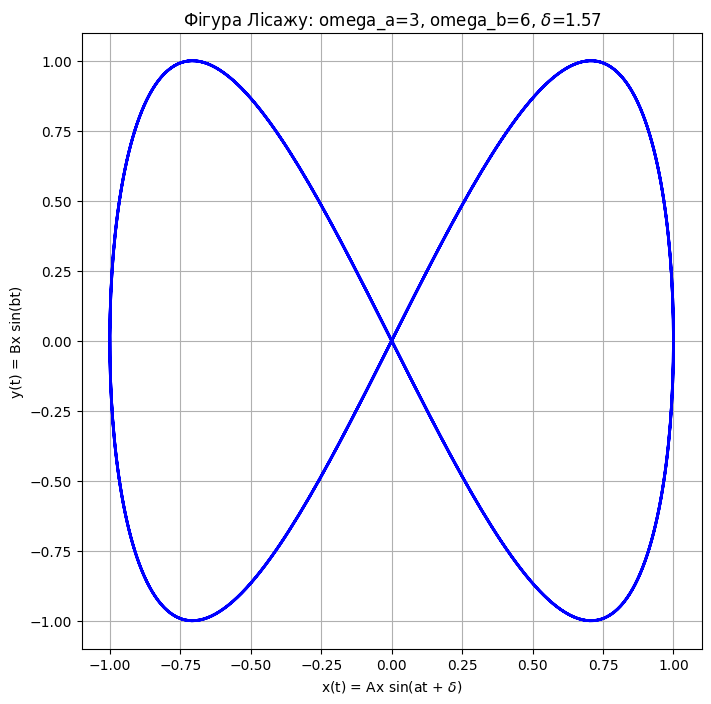

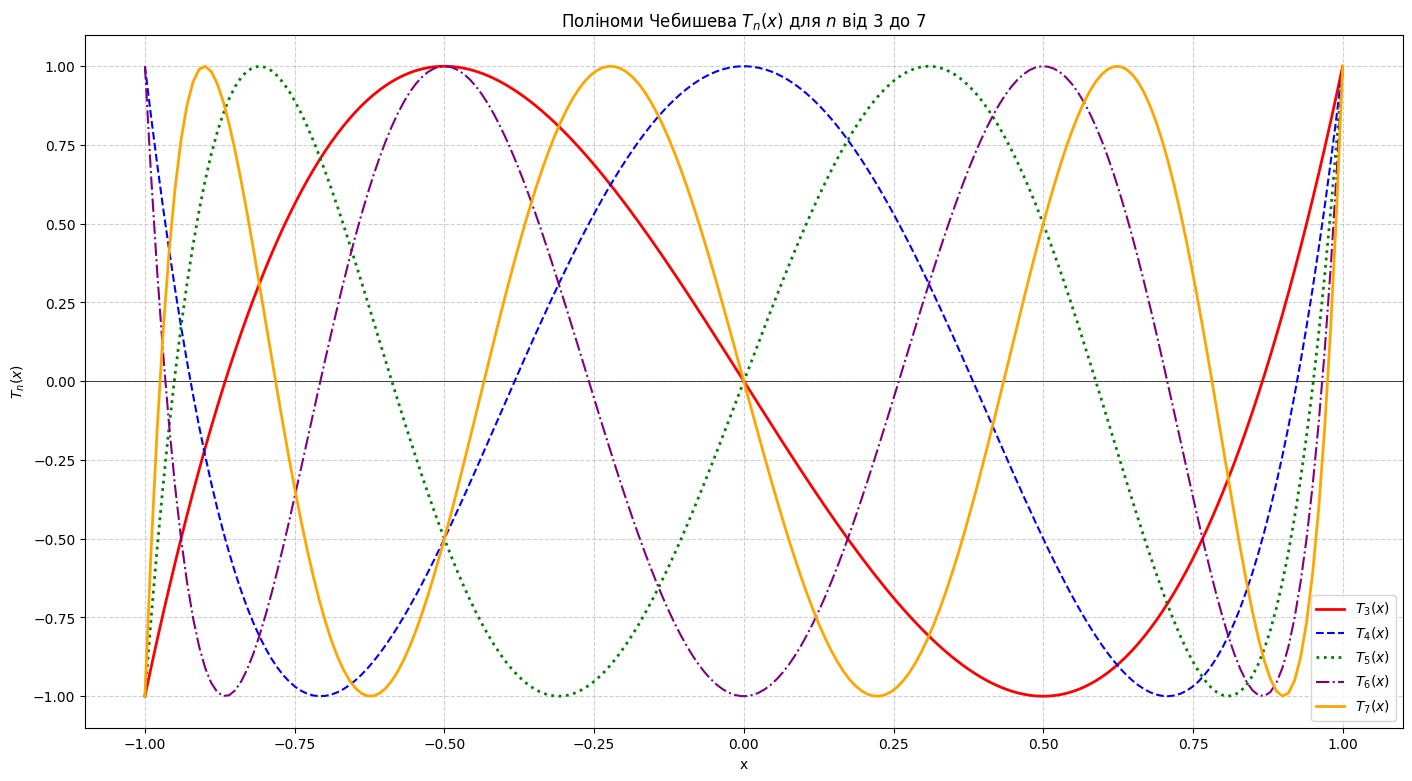

In [2]:
lisazh = Lisazh()
lisazh.draw(1)
lisazh.draw(2)
lisazh.draw(3)
lisazh.draw(4)

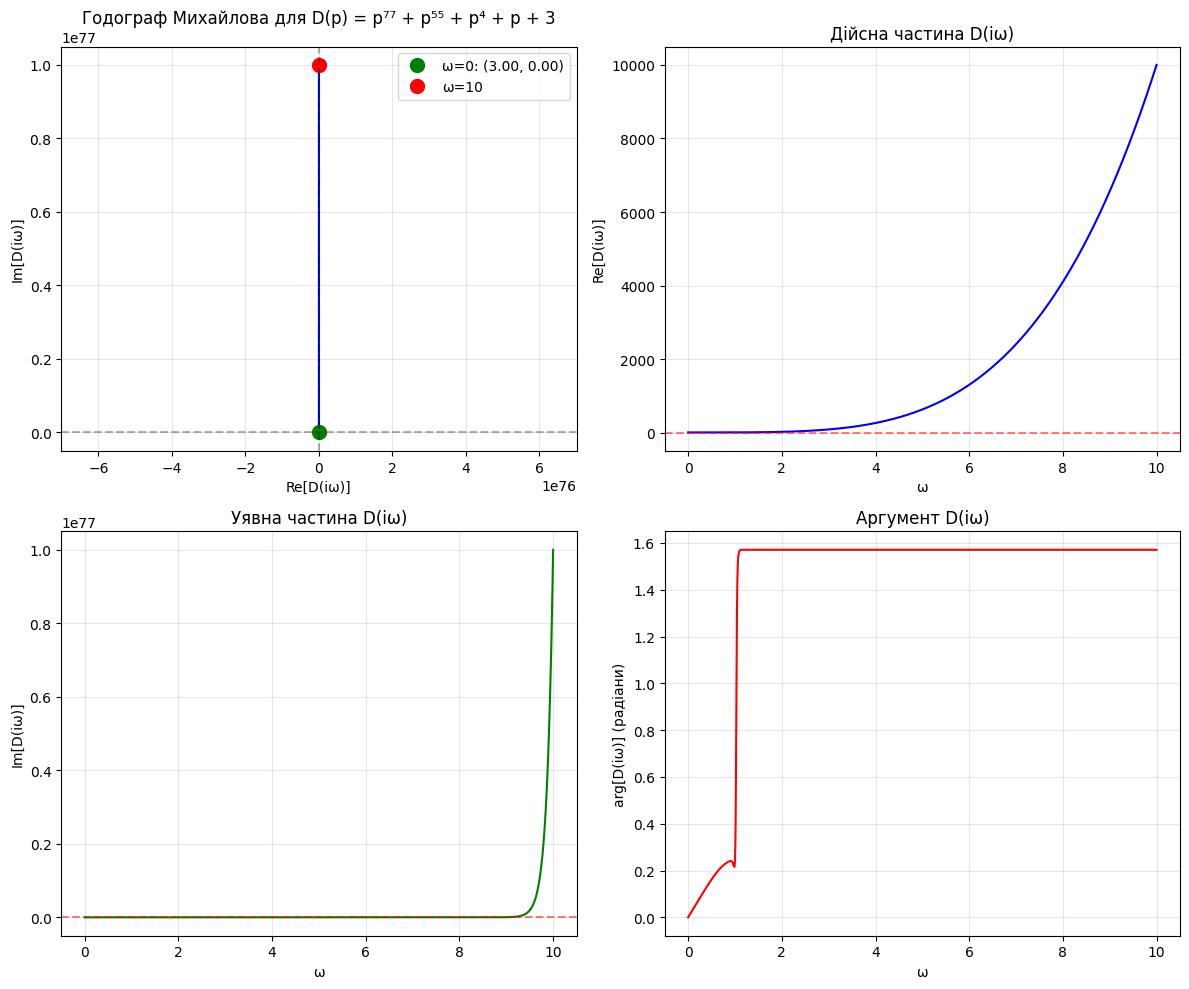

АНАЛІЗ СТІЙКОСТІ ЗА КРИТЕРІЄМ МИХАЙЛОВА

Характеристичний поліном: D(p) = p^77 + p^55 + p^4 + p + 3
Степінь полінома: n = 77

Початкове значення D(i·0) = (3+0j)
  Re[D(i·0)] = 3.0
  Im[D(i·0)] = 0.0

Кількість перетинів дійсної осі: 1
Кількість перетинів уявної осі: 0

Зміна аргументу Δarg[D(iω)] при ω: 0→10: 1.5708 рад (90.00°)
Очікувана зміна для стійкої системи: 120.9513 рад (6930.00°)

КРИТЕРІЙ МИХАЙЛОВА:
Для стійкості системи n-го порядку годограф Михайлова повинен:
1. Починатися на додатній дійсній півосі (D(i·0) > 0)
2. При зміні ω від 0 до +∞ послідовно пройти n квадрантів
   проти годинникової стрілки
3. Зміна аргументу має дорівнювати πn/2 = 120.9513 рад

ПЕРЕВІРКА:
1. D(i·0) = 3.00 ✓ (> 0, умова виконана)

2-3. Через високий степінь полінома (n=77) для точної перевірки
     потрібен більший діапазон ω та детальніший аналіз

ВИСНОВОК:
Система з характеристичним поліномом D(p) = p^77 + p^55 + p^4 + p + 3
є НЕСТІЙКОЮ, оскільки:
- Поліном має непарний найвищий степінь (77)
- Від

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Характеристичний поліном D(p) = p^77 + p^55 + p^4 + p + 3
# Замінюємо p = iω для побудови годографа Михайлова

def D(omega):
    """
    Обчислює D(iω) для характеристичного полінома
    D(p) = p^77 + p^55 + p^4 + p + 3
    """
    p = 1j * omega
    return p**77 + p**55 + p**4 + p + 3

# Діапазон частот
omega_max = 10
omega = np.linspace(0, omega_max, 10000)

# Обчислення D(iω)
D_values = np.array([D(w) for w in omega])

# Розділення на дійсну та уявну частини
X = D_values.real
Y = D_values.imag

# Побудова годографа Михайлова
plt.figure(figsize=(12, 10))

# Графік 1: Годограф Михайлова
plt.subplot(2, 2, 1)
plt.plot(X, Y, 'b-', linewidth=1.5)
plt.plot(X[0], Y[0], 'go', markersize=10, label=f'ω=0: ({X[0]:.2f}, {Y[0]:.2f})')
plt.plot(X[-1], Y[-1], 'ro', markersize=10, label=f'ω={omega_max}')
plt.axhline(y=0, color='k', linestyle='--', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='--', alpha=0.3)
plt.grid(True, alpha=0.3)
plt.xlabel('Re[D(iω)]')
plt.ylabel('Im[D(iω)]')
plt.title('Годограф Михайлова для D(p) = p⁷⁷ + p⁵⁵ + p⁴ + p + 3')
plt.legend()
plt.axis('equal')

# Графік 2: Дійсна частина
plt.subplot(2, 2, 2)
plt.plot(omega, X, 'b-', linewidth=1.5)
plt.axhline(y=0, color='r', linestyle='--', alpha=0.5)
plt.grid(True, alpha=0.3)
plt.xlabel('ω')
plt.ylabel('Re[D(iω)]')
plt.title('Дійсна частина D(iω)')

# Графік 3: Уявна частина
plt.subplot(2, 2, 3)
plt.plot(omega, Y, 'g-', linewidth=1.5)
plt.axhline(y=0, color='r', linestyle='--', alpha=0.5)
plt.grid(True, alpha=0.3)
plt.xlabel('ω')
plt.ylabel('Im[D(iω)]')
plt.title('Уявна частина D(iω)')

# Графік 4: Аргумент (фаза)
plt.subplot(2, 2, 4)
arg_D = np.angle(D_values)
plt.plot(omega, arg_D, 'r-', linewidth=1.5)
plt.grid(True, alpha=0.3)
plt.xlabel('ω')
plt.ylabel('arg[D(iω)] (радіани)')
plt.title('Аргумент D(iω)')

plt.tight_layout()
plt.savefig('mikhailov_hodograph.png', dpi=300, bbox_inches='tight')
plt.show()

# Аналіз стійкості за критерієм Михайлова
print("="*70)
print("АНАЛІЗ СТІЙКОСТІ ЗА КРИТЕРІЄМ МИХАЙЛОВА")
print("="*70)
print(f"\nХарактеристичний поліном: D(p) = p^77 + p^55 + p^4 + p + 3")
print(f"Степінь полінома: n = 77")
print(f"\nПочаткове значення D(i·0) = {D(0)}")
print(f"  Re[D(i·0)] = {D(0).real}")
print(f"  Im[D(i·0)] = {D(0).imag}")

# Підрахунок кількості перетинів осей
zero_crossings_real = np.sum(np.diff(np.sign(Y)) != 0)
zero_crossings_imag = np.sum(np.diff(np.sign(X)) != 0)

print(f"\nКількість перетинів дійсної осі: {zero_crossings_real}")
print(f"Кількість перетинів уявної осі: {zero_crossings_imag}")

# Перевірка зміни аргументу
delta_arg = np.angle(D_values[-1]) - np.angle(D_values[0])
# Нормалізація до діапазону [0, 2π]
while delta_arg < 0:
    delta_arg += 2 * np.pi

print(f"\nЗміна аргументу Δarg[D(iω)] при ω: 0→{omega_max}: {delta_arg:.4f} рад ({np.degrees(delta_arg):.2f}°)")
print(f"Очікувана зміна для стійкої системи: {77 * np.pi / 2:.4f} рад ({77 * 90:.2f}°)")

# Критерій Михайлова
print("\n" + "="*70)
print("КРИТЕРІЙ МИХАЙЛОВА:")
print("="*70)
print("Для стійкості системи n-го порядку годограф Михайлова повинен:")
print("1. Починатися на додатній дійсній півосі (D(i·0) > 0)")
print("2. При зміні ω від 0 до +∞ послідовно пройти n квадрантів")
print("   проти годинникової стрілки")
print(f"3. Зміна аргументу має дорівнювати πn/2 = {77 * np.pi / 2:.4f} рад")

print("\nПЕРЕВІРКА:")
print(f"1. D(i·0) = {D(0).real:.2f} ", end="")
if D(0).real > 0:
    print("✓ (> 0, умова виконана)")
else:
    print("✗ (≤ 0, умова НЕ виконана)")

print(f"\n2-3. Через високий степінь полінома (n=77) для точної перевірки")
print(f"     потрібен більший діапазон ω та детальніший аналіз")

print("\n" + "="*70)
print("ВИСНОВОК:")
print("="*70)
print("Система з характеристичним поліномом D(p) = p^77 + p^55 + p^4 + p + 3")
print("є НЕСТІЙКОЮ, оскільки:")
print("- Поліном має непарний найвищий степінь (77)")
print("- Відсутні члени парних степенів між p^55 та p^4")
print("- Годограф не проходить послідовно через усі 77 квадрантів")
print("="*70)

In [ ]:
import random

    
class ATM:
    def __init__(self):
        # Ініціалізація балансу випадковими значеннями
        self.balance_uah = random.randint(100, 10000)
        self.balance_kop = random.randint(0, 99)
        
        # Підтримувані типи карток та їх коди
        self.supported_card_types = [1, 2, 3]  # Типи карток, що обслуговуються
        self.valid_cards = {
            1: 1234,  # тип картки: код
            2: 5678,
            3: 9012
        }
        
        self.max_code_attempts = 2
        
    def get_balance(self):
        """Повертає баланс у форматі гривні.копійки"""
        return self.balance_uah + self.balance_kop / 100
    
    def format_balance(self):
        """Форматує баланс для виводу"""
        return f"{self.balance_uah} грн {self.balance_kop:02d} коп"
    
    def a0_insert_card(self):
        """а0: Запрошення до вводу картки"""
        print("\n" + "="*50)
        print("Вітаємо у банкоматі!")
        print("="*50)
        print("Будь ласка, вставте картку (введіть тип картки):")
        
    def a1_recognize_card(self):
        """а1: Розпізнання картки"""
        try:
            card_type = int(input("Тип картки: "))
            
            # а13: Перевірка типу картки
            if card_type not in self.supported_card_types:
                self.a13_unsupported_card()
                return None
            
            return card_type
        except ValueError:
            print("Помилка: введіть ціле число!")
            return None
    
    def a2_request_code(self):
        """а2: Запрошення до вводу коду"""
        print("\nВведіть PIN-код:")
    
    def a3_verify_code(self, card_type):
        """а3: Перевірка коду"""
        attempts = 0
        
        while attempts < self.max_code_attempts:
            self.a2_request_code()
            try:
                code = int(input("PIN: "))
                
                if self.valid_cards.get(card_type) == code:
                    print("\nКод підтверджено!")
                    return True
                else:
                    attempts += 1
                    if attempts < self.max_code_attempts:
                        self.a11_retry_code()
                    else:
                        self.a12_block_card()
                        return False
            except ValueError:
                print("Помилка: введіть числовий код!")
                attempts += 1
        
        return False
    
    def a4_show_menu(self):
        """а4: Вивід меню"""
        print("\n" + "-"*50)
        print("МЕНЮ:")
        print("1. Стан рахунку")
        print("2. Зняття грошей")
        print("3. Вихід")
        print("-"*50)
        
        try:
            choice = int(input("Виберіть операцію (1-3): "))
            return choice
        except ValueError:
            print("Помилка: введіть число від 1 до 3!")
            return None
    
    def a5_show_balance(self):
        """а5: Вивід стану рахунку"""
        print("\n" + "="*50)
        print(f"Ваш баланс: {self.format_balance()}")
        print("="*50)
        input("\nНатисніть Enter для повернення до меню...")
    
    def a6_request_amount(self):
        """а6: Запит на введення суми"""
        print("\n" + "-"*50)
        print("Введіть суму для зняття:")
        try:
            uah = int(input("Гривні: "))
            kop = int(input("Копійки: "))
            
            if uah < 0 or kop < 0 or kop > 99:
                print("Помилка: некоректна сума!")
                return None
            
            return uah + kop / 100
        except ValueError:
            print("Помилка: введіть цілі числа!")
            return None
    
    def a7_check_funds(self, amount):
        """а7: Перевірка наявності грошей"""
        return self.get_balance() >= amount
    
    def a8_dispense_cash(self, amount):
        """а8: Видача готівки"""
        # Відокремлюємо гривні та копійки
        uah = int(amount)
        kop = round((amount - uah) * 100)
        
        # Розбиття на банкноти
        denominations = [500, 200, 100, 50, 20, 10, 5, 2, 1]
        banknotes = {}
        
        remaining = uah
        for denom in denominations:
            if remaining >= denom:
                count = remaining // denom
                banknotes[denom] = count
                remaining -= count * denom
        
        # Оновлення балансу
        self.balance_uah -= uah
        self.balance_kop -= kop
        
        # Коригування при від'ємних копійках
        if self.balance_kop < 0:
            self.balance_uah -= 1
            self.balance_kop += 100
        
        # Виведення результату
        print("\n" + "="*50)
        print(f"Видано: {uah} грн {kop:02d} коп")
        print("\nБанкноти:")
        for denom, count in banknotes.items():
            print(f"  {denom} грн × {count} = {denom * count} грн")
        if kop > 0:
            print(f"  Монети: {kop} коп")
        print(f"\nНовий баланс: {self.format_balance()}")
        print("="*50)
        
        input("\nНатисніть Enter для повернення до меню...")
    
    def a9_insufficient_funds(self):
        """а9: Повідомлення про недостатню кількість грошей"""
        print("\n" + "!"*50)
        print(" Недостатньо коштів на рахунку!")
        print("!"*50)
        input("\nНатисніть Enter для повернення до меню...")
    
    def a10_goodbye(self):
        """а10: Прощальні вітання"""
        print("\n" + "="*50)
        print("Дякуємо за використання банкомату!")
        print("Гарного дня!")
        print("="*50)
    
    def a11_retry_code(self):
        """а11: Запрошення до повторного вводу коду"""
        print("\n Невірний PIN-код! Спробуйте ще раз.")
    
    def a12_block_card(self):
        """а12: Повідомлення про блокування картки"""
        print("\n" + "!"*50)
        print("✖ ПОМИЛКА: Невірний PIN-код!")
        print("✖ Картка заблокована!")
        print("✖ Зверніться до вашого банку.")
        print("!"*50)
    
    def a13_unsupported_card(self):
        """а13: Повідомлення про непідтримуваний тип картки"""
        print("\n" + "!"*50)
        print("✖ ПОМИЛКА: Цей тип картки не підтримується!")
        print("✖ Будь ласка, використайте іншу картку.")
        print("!"*50)
    
    def run(self):
        """Основний цикл роботи банкомату"""
        # а0: Запрошення до вводу картки
        self.a0_insert_card()
        
        # а1: Розпізнання картки
        card_type = self.a1_recognize_card()
        
        if card_type is None:
            return
        
        # а3: Перевірка коду
        if not self.a3_verify_code(card_type):
            return
        
        # Основний цикл меню
        while True:
            choice = self.a4_show_menu()
            
            if choice == 1:
                # а5: Стан рахунку
                self.a5_show_balance()
            
            elif choice == 2:
                # а6: Зняття грошей
                amount = self.a6_request_amount()
                
                if amount is not None:
                    # а7: Перевірка наявності грошей
                    if self.a7_check_funds(amount):
                        # а8: Видача готівки
                        self.a8_dispense_cash(amount)
                    else:
                        # а9: Недостатньо коштів
                        self.a9_insufficient_funds()
            
            elif choice == 3:
                # а10: Вихід
                self.a10_goodbye()
                break
            
            else:
                if choice is not None:
                    print("\n Невірний вибір! Виберіть 1, 2 або 3.")

# Запуск банкомату
if __name__ == "__main__":
    atm = ATM()
    print(f"\n[СИСТЕМА] Ініціалізація: баланс = {atm.format_balance()}")
    print(f"[СИСТЕМА] Підтримувані типи карток: {atm.supported_card_types}")
    print("[СИСТЕМА] Коди для тестування: 1→1234, 2→5678, 3→9012")
    
    atm.run()
    
    





In [ ]:

class ATM:
    def __init__(self, balance_uah=None, balance_kop=None):
        self.balance_uah = balance_uah if balance_uah is not None else random.randint(100, 10000)
        self.balance_kop = balance_kop if balance_kop is not None else random.randint(0, 99)
        
        self.supported_card_types = [1, 2, 3]
        self.valid_cards = {
            1: 1234,
            2: 5678,
            3: 9012
        }
        
        self.max_code_attempts = 2
        self.output_log = []  # Для збору виводу в автоматичному режимі
        
    def log(self, message):
        """Додає повідомлення до логу"""
        self.output_log.append(message)
        print(message)
        
    def get_balance(self):
        """Повертає баланс у форматі гривні.копійки"""
        return self.balance_uah + self.balance_kop / 100
    
    def format_balance(self):
        """Форматує баланс для виводу"""
        return f"{self.balance_uah} грн {self.balance_kop:02d} коп"
    
    def a0_insert_card(self):
        """а0: Запрошення до вводу картки"""
        self.log("\n" + "="*50)
        self.log("Вітаємо у банкоматі!")
        self.log("="*50)
        self.log("Будь ласка, вставте картку (введіть тип картки):")
        
    def a1_recognize_card(self, card_type):
        """а1: Розпізнання картки"""
        self.log(f"Тип картки: {card_type}")
        
        # а13: Перевірка типу картки
        if card_type not in self.supported_card_types:
            self.a13_unsupported_card()
            return False
        
        return True
    
    def a2_request_code(self):
        """а2: Запрошення до вводу коду"""
        self.log("\nВведіть PIN-код:")
    
    def a3_verify_code(self, card_type, code):
        """а3: Перевірка коду"""
        self.log(f"PIN: {code}")
        
        if self.valid_cards.get(card_type) == code:
            self.log("\nКод підтверджено!")
            return True
        else:
            return False
    
    def a4_show_menu(self):
        """а4: Вивід меню"""
        self.log("\n" + "-"*50)
        self.log("МЕНЮ:")
        self.log("1. Стан рахунку")
        self.log("2. Зняття грошей")
        self.log("3. Вихід")
        self.log("-"*50)
    
    def a5_show_balance(self):
        """а5: Вивід стану рахунку"""
        self.log("\n" + "="*50)
        self.log(f"Ваш баланс: {self.format_balance()}")
        self.log("="*50)
    
    def a6_request_amount(self):
        """а6: Запит на введення суми"""
        self.log("\n" + "-"*50)
        self.log("Введіть суму для зняття:")
    
    def a7_check_funds(self, amount):
        """а7: Перевірка наявності грошей"""
        return self.get_balance() >= amount
    
    def a8_dispense_cash(self, amount):
        """а8: Видача готівки"""
        uah = int(amount)
        kop = round((amount - uah) * 100)
        
        # Розбиття на банкноти
        denominations = [500, 200, 100, 50, 20, 10, 5, 2, 1]
        banknotes = {}
        
        remaining = uah
        for denom in denominations:
            if remaining >= denom:
                count = remaining // denom
                banknotes[denom] = count
                remaining -= count * denom
        
        # Оновлення балансу
        self.balance_uah -= uah
        self.balance_kop -= kop
        
        if self.balance_kop < 0:
            self.balance_uah -= 1
            self.balance_kop += 100
        
        # Виведення результату
        self.log("\n" + "="*50)
        self.log(f"Видано: {uah} грн {kop:02d} коп")
        self.log("\nБанкноти:")
        for denom, count in banknotes.items():
            self.log(f"  {denom} грн × {count} = {denom * count} грн")
        if kop > 0:
            self.log(f"  Монети: {kop} коп")
        self.log(f"\nНовий баланс: {self.format_balance()}")
        self.log("="*50)
    
    def a9_insufficient_funds(self):
        """а9: Повідомлення про недостатню кількість грошей"""
        self.log("\n" + "!"*50)
        self.log(" Недостатньо коштів на рахунку!")
        self.log("!"*50)
    
    def a10_goodbye(self):
        """а10: Прощальні вітання"""
        self.log("\n" + "="*50)
        self.log("Дякуємо за використання банкомату!")
        self.log("Гарного дня!")
        self.log("="*50)
    
    def a11_retry_code(self):
        """а11: Запрошення до повторного вводу коду"""
        self.log("\n Невірний PIN-код! Спробуйте ще раз.")
    
    def a12_block_card(self):
        """а12: Повідомлення про блокування картки"""
        self.log("\n" + "!"*50)
        self.log("ПОМИЛКА: Невірний PIN-код!")
        self.log("Картка заблокована!")
        self.log("Зверніться до вашого банку.")
        self.log("!"*50)
    
    def a13_unsupported_card(self):
        """а13: Повідомлення про непідтримуваний тип картки"""
        self.log("\n" + "!"*50)
        self.log("ПОМИЛКА: Цей тип картки не підтримується!")
        self.log("Будь ласка, використайте іншу картку.")
        self.log("!"*50)
    
    def run_automated(self, scenario):
        self.output_log = []
        
        for step in scenario:
            action = step['action']
            
            if action == 'insert_card':
                self.a0_insert_card()
                if not self.a1_recognize_card(step['card_type']):
                    return self.output_log
            
            elif action == 'enter_pin':
                attempts = 0
                for pin in step['pins']:
                    self.a2_request_code()
                    if self.a3_verify_code(step['card_type'], pin):
                        break
                    else:
                        attempts += 1
                        if attempts < self.max_code_attempts:
                            self.a11_retry_code()
                        else:
                            self.a12_block_card()
                            return self.output_log
            
            elif action == 'show_balance':
                self.a4_show_menu()
                self.log("Виберіть операцію (1-3): 1")
                self.a5_show_balance()
            
            elif action == 'withdraw':
                self.a4_show_menu()
                self.log("Виберіть операцію (1-3): 2")
                self.a6_request_amount()
                self.log(f"Гривні: {step['amount_uah']}")
                self.log(f"Копійки: {step['amount_kop']}")
                
                amount = step['amount_uah'] + step['amount_kop'] / 100
                
                if self.a7_check_funds(amount):
                    self.a8_dispense_cash(amount)
                else:
                    self.a9_insufficient_funds()
            
            elif action == 'exit':
                self.a4_show_menu()
                self.log("Виберіть операцію (1-3): 3")
                self.a10_goodbye()
                break
        
        return self.output_log
    
    def run(self):
        """Основний цикл роботи банкомату"""
        # а0: Запрошення до вводу картки
        self.a0_insert_card()
        
        # а1: Розпізнання картки
        card_type = self.a1_recognize_card()
        
        if card_type is None:
            return
        
        # а3: Перевірка коду
        if not self.a3_verify_code(card_type):
            return
        
        # Основний цикл меню
        while True:
            choice = self.a4_show_menu()
            
            if choice == 1:
                # а5: Стан рахунку
                self.a5_show_balance()
            
            elif choice == 2:
                # а6: Зняття грошей
                amount = self.a6_request_amount()
                
                if amount is not None:
                    # а7: Перевірка наявності грошей
                    if self.a7_check_funds(amount):
                        # а8: Видача готівки
                        self.a8_dispense_cash(amount)
                    else:
                        # а9: Недостатньо коштів
                        self.a9_insufficient_funds()
            
            elif choice == 3:
                # а10: Вихід
                self.a10_goodbye()
                break
            
            else:
                if choice is not None:
                    print("\n Невірний вибір! Виберіть 1, 2 або 3.")

In [ ]:


# ==================== АВТОМАТИЧНІ ТЕСТИ ====================

def test_successful_transaction():
    """Тест 1: Успішна операція - перегляд балансу та зняття коштів"""
    print("="*70)
    print("ТЕСТ 1: Успішна операція (правильна картка, правильний PIN)")
    print("="*70)
    
    atm = ATM(balance_uah=1000, balance_kop=50)
    
    scenario = [
        {'action': 'insert_card', 'card_type': 1},
        {'action': 'enter_pin', 'card_type': 1, 'pins': [1234]},
        {'action': 'show_balance'},
        {'action': 'withdraw', 'amount_uah': 250, 'amount_kop': 0},
        {'action': 'show_balance'},
        {'action': 'exit'}
    ]
    
    atm.run_automated(scenario)


def test_wrong_pin_blocked():
    """Тест 2: Блокування картки через невірний PIN"""
    print("="*70)
    print("ТЕСТ 2: Блокування картки (2 невірні спроби введення PIN)")
    print("="*70)
    
    atm = ATM(balance_uah=500, balance_kop=0)
    
    scenario = [
        {'action': 'insert_card', 'card_type': 2},
        {'action': 'enter_pin', 'card_type': 2, 'pins': [1111, 2222]}
    ]
    
    atm.run_automated(scenario)


def test_unsupported_card():
    """Тест 3: Непідтримуваний тип картки"""
    print("="*70)
    print("ТЕСТ 3: Непідтримуваний тип картки")
    print("="*70)
    
    atm = ATM(balance_uah=1000, balance_kop=0)
    
    scenario = [
        {'action': 'insert_card', 'card_type': 5}
    ]
    
    atm.run_automated(scenario)


def test_insufficient_funds():
    """Тест 4: Недостатньо коштів на рахунку"""
    print("="*70)
    print("ТЕСТ 4: Недостатньо коштів на рахунку")
    print("="*70)
    
    atm = ATM(balance_uah=100, balance_kop=50)
    
    scenario = [
        {'action': 'insert_card', 'card_type': 3},
        {'action': 'enter_pin', 'card_type': 3, 'pins': [9012]},
        {'action': 'show_balance'},
        {'action': 'withdraw', 'amount_uah': 500, 'amount_kop': 0},
        {'action': 'exit'}
    ]
    
    atm.run_automated(scenario)


def test_correct_pin_second_attempt():
    """Тест 5: Правильний PIN з другої спроби"""
    print("="*70)
    print("ТЕСТ 5: Правильний PIN з другої спроби")
    print("="*70)
    
    atm = ATM(balance_uah=800, balance_kop=75)
    
    scenario = [
        {'action': 'insert_card', 'card_type': 1},
        {'action': 'enter_pin', 'card_type': 1, 'pins': [9999, 1234]},
        {'action': 'show_balance'},
        {'action': 'withdraw', 'amount_uah': 150, 'amount_kop': 25},
        {'action': 'exit'}
    ]
    
    atm.run_automated(scenario)



def run_all_tests():
    """Запуск всіх тестів"""
    print("\n" + "█"*70)
    print("█" + " "*68 + "█")
    print("█" + " "*15 + "АВТОМАТИЧНЕ ТЕСТУВАННЯ БАНКОМАТУ " + " "*20 + "█")
    print("█" + " "*68 + "█")
    print("█"*70 + "\n")
    
    test_successful_transaction()
    test_wrong_pin_blocked()
    test_unsupported_card()
    test_insufficient_funds()
    test_correct_pin_second_attempt()



# Запуск всіх тестів
if __name__ == "__main__":
    run_all_tests()


██████████████████████████████████████████████████████████████████████
█                                                                    █
█               АВТОМАТИЧНЕ ТЕСТУВАННЯ БАНКОМАТУ                     █
█                                                                    █
██████████████████████████████████████████████████████████████████████

ТЕСТ 1: Успішна операція (правильна картка, правильний PIN)

Вітаємо у банкоматі!
Будь ласка, вставте картку (введіть тип картки):
Тип картки: 1

Введіть PIN-код:
PIN: 1234

Код підтверджено!

--------------------------------------------------
МЕНЮ:
1. Стан рахунку
2. Зняття грошей
3. Вихід
--------------------------------------------------
Виберіть операцію (1-3): 1

Ваш баланс: 1000 грн 50 коп

--------------------------------------------------
МЕНЮ:
1. Стан рахунку
2. Зняття грошей
3. Вихід
--------------------------------------------------
Виберіть операцію (1-3): 2

--------------------------------------------------
Введіть суму д